In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Dropout
from tensorflow.keras.layers import MaxPooling2D , Conv2D
import os
from tensorflow.keras.optimizers import Adam

C:\Users\Deepanshu Somani\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Deepanshu Somani\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Deepanshu Somani\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Deepanshu Somani\anaconda3\lib\site-packages\tensorflow\python\f

In [2]:
train_dir = 'data/train'
val_dir = 'data/test'

In [3]:
num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50

In [4]:
train_datagen = ImageDataGenerator(1./255)
val_datagen = ImageDataGenerator(1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (48,48),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (48,48),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [9]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)


C:\Users\Deepanshu Somani\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50


C:\Users\Deepanshu Somani\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Deepanshu Somani\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Deepanshu Somani\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Deepanshu Somani\anaconda3\lib\

448/448 [==============================] - 108s 241ms/step - loss: 2.2475 - acc: 0.2221 - val_loss: 1.8736 - val_acc: 0.2559
Epoch 2/50
448/448 [==============================] - 22s 48ms/step - loss: 1.8193 - acc: 0.2496 - val_loss: 1.8110 - val_acc: 0.2888
Epoch 3/50
448/448 [==============================] - 22s 49ms/step - loss: 1.7728 - acc: 0.2851 - val_loss: 1.6959 - val_acc: 0.3368
Epoch 4/50
448/448 [==============================] - 22s 50ms/step - loss: 1.7089 - acc: 0.3237 - val_loss: 1.6116 - val_acc: 0.3943
Epoch 5/50
448/448 [==============================] - 22s 49ms/step - loss: 1.6281 - acc: 0.3658 - val_loss: 1.5466 - val_acc: 0.4029
Epoch 6/50
448/448 [==============================] - 22s 49ms/step - loss: 1.5567 - acc: 0.3974 - val_loss: 1.4570 - val_acc: 0.4587
Epoch 7/50
448/448 [==============================] - 25s 55ms/step - loss: 1.4980 - acc: 0.4183 - val_loss: 1.4006 - val_acc: 0.4739
Epoch 8/50
448/448 [==============================] - 23s 50ms/step - l

In [13]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

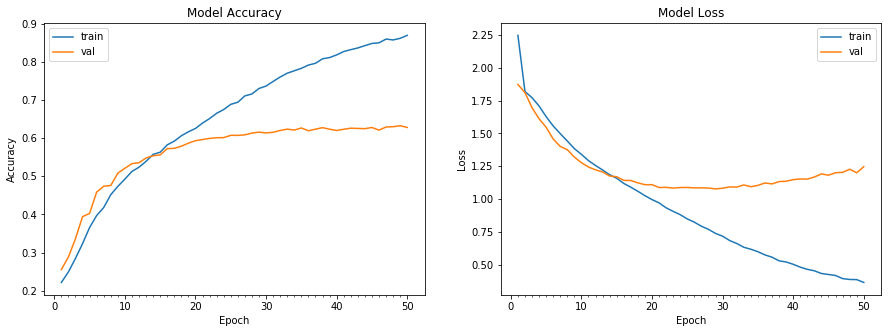

In [15]:
plot_model_history(model_info)

In [16]:
from keras.models import model_from_json 
#plot_model_history(model_info)
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
   # json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
#model.save_weights('model.h5')

Saved model to disk


In [17]:
model.load_weights('model.h5')
#cv2.ocl.setUseOpenCL(False)

In [28]:

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID') 
out = cv2.VideoWriter('output8.avi', fourcc, 20.0, (640, 480)) 

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
        
    
    #facecasc = facecasc.load('haarcascade_frontalface_default.xml')
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        out.write(frame)

    cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
out.release()
cv2.destroyAllWindows()
   